In [26]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('train.csv')
print(df.info())
ndf=df.dropna()
ndf['Family_Size']=ndf['Family_Size'].astype(int)
print(ndf.info())

<class 'pandas.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   str    
 2   Ever_Married     7928 non-null   str    
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   str    
 5   Profession       7944 non-null   str    
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   str    
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   str    
 10  Segmentation     8068 non-null   str    
dtypes: float64(2), int64(2), str(7)
memory usage: 693.5 KB
None
<class 'pandas.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6665 non-null   int64  
 1   Gender 

In [20]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------- ----------------------------- 2.1/8.0 MB 13.8 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/8.0 MB 17.4 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 17.4 MB/s eta 0:00:00
   ---------------------------------------- 0.0/36.3 MB ? eta -:--:--
   ----- ---------------------------------- 5.2/36.3 MB 25.5 MB/s eta 0:00:02
   ----------- ---------------------------- 10.7/36.3 MB 25.7 MB/s eta 0:00:01
   ------------------ --------------------- 16.5/36.3 MB 26.1 MB/s eta 0:00:01
   ------------------------ --------------- 22.3/36.3 MB 26.4 MB/s eta 0:00:01
   ----------------------------- ---------- 26.7/36.3 MB 25.1 MB/s eta 0:00:01
   --------------------------------- ------ 30.7/36.3 MB 24.1 MB/s eta 0:00:01
   ---------------------------------------  36.2/36.3 MB 25.1 MB/s eta 0:00:01
   ---------------------------------------- 36.3/36.3 MB 23.7 MB/s eta 0:00:00


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
ndf['Spending_Score_Encoded'] = le.fit_transform(ndf['Spending_Score'])
X = ndf[['Age', 'Work_Experience', 'Family_Size', 'Spending_Score_Encoded']]


In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
ndf.info()


<class 'pandas.DataFrame'>
Index: 6665 entries, 0 to 8067
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      6665 non-null   int64  
 1   Gender                  6665 non-null   str    
 2   Ever_Married            6665 non-null   str    
 3   Age                     6665 non-null   int64  
 4   Graduated               6665 non-null   str    
 5   Profession              6665 non-null   str    
 6   Work_Experience         6665 non-null   float64
 7   Spending_Score          6665 non-null   str    
 8   Family_Size             6665 non-null   int64  
 9   Var_1                   6665 non-null   str    
 10  Segmentation            6665 non-null   str    
 11  Cluster                 6665 non-null   int32  
 12  Spending_Score_Encoded  6665 non-null   int64  
dtypes: float64(1), int32(1), int64(4), str(7)
memory usage: 702.9 KB


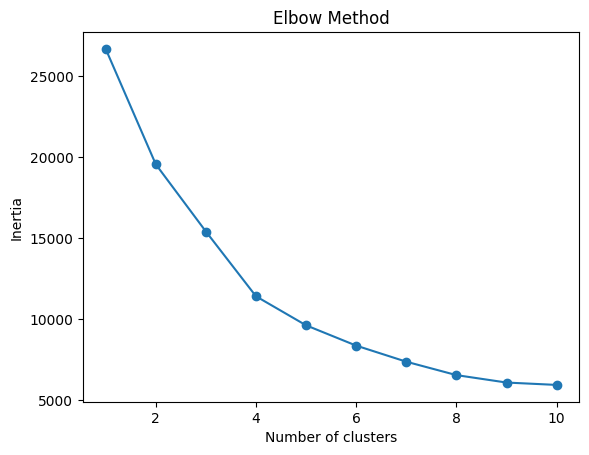

In [32]:
from sklearn.cluster import KMeans
inertia = []

for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



In [34]:
kmeans = KMeans(n_clusters=3, random_state=42)
ndf['Cluster'] = kmeans.fit_predict(X_scaled)
cluster_profile = ndf.groupby('Cluster').agg({
    'Age': 'mean',
    'Work_Experience': 'mean',
    'Family_Size': 'mean',
    'Spending_Score_Encoded': 'mean',
    'ID': 'count'
}).rename(columns={'ID':'Customer_Count'})

print(cluster_profile)

               Age  Work_Experience  Family_Size  Spending_Score_Encoded  \
Cluster                                                                    
0        59.218919         1.219459     1.676216                1.731351   
1        47.429985         2.358733     3.250866                0.177635   
2        30.335361         3.758053     3.316034                1.947029   

         Customer_Count  
Cluster                  
0                  1850  
1                  2021  
2                  2794  


In [35]:
ndf.to_csv('cleaned_Train.csv')